In [1]:
# import dependencies
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.head(3)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,inf,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0


In [3]:
# Learn more about our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Date           34857 non-null  object 
 7   Distance       34856 non-null  float64
 8   Postcode       34856 non-null  float64
 9   Bedroom        26640 non-null  float64
 10  Bathroom       26631 non-null  float64
 11  Car            26129 non-null  float64
 12  Landsize       23047 non-null  float64
 13  BuildingArea   13760 non-null  object 
 14  YearBuilt      15551 non-null  float64
 15  CouncilArea    34854 non-null  object 
 16  Latitude       26881 non-null  float64
 17  Longtitude     26881 non-null  float64
 18  Region

In [4]:
# Drop unnecessary columns
df.drop(["Suburb",
         "Address",
         "Method",
         "SellerG",
         "Bedroom",
         "BuildingArea",
         "YearBuilt",
         "CouncilArea",
         "Latitude",
         "Longtitude"], axis=1, inplace=True)
df.shape

(34857, 12)

In [5]:
# Rename columns
melbourne_df = df.rename(columns={"Landsize": "Land Size",
                                  "Regionname": "Region",
                                  "Propertycount": "Property Count"})


In [6]:
# Identify missing data
melbourne_df.isna().sum()

Rooms                 0
Type                  0
Date                  0
Distance              1
Postcode              1
Bathroom           8226
Car                8728
Land Size         11810
Region                0
Property Count        3
ParkingArea           0
Price              7610
dtype: int64

In [7]:
# drop missing value
melbourne_df.dropna(inplace = True)

In [8]:
# Identify missing data
melbourne_df.isna().sum()

Rooms             0
Type              0
Date              0
Distance          0
Postcode          0
Bathroom          0
Car               0
Land Size         0
Region            0
Property Count    0
ParkingArea       0
Price             0
dtype: int64

In [9]:
# check duplicate value
melbourne_df.drop_duplicates(inplace = True)

In [10]:
# change format
melbourne_df['Date'] = pd.to_datetime(melbourne_df['Date'])
melbourne_df['Year'] = melbourne_df['Date'].dt.year
melbourne_df.drop(['Date'], axis = 1, inplace = True)


<Axes: >

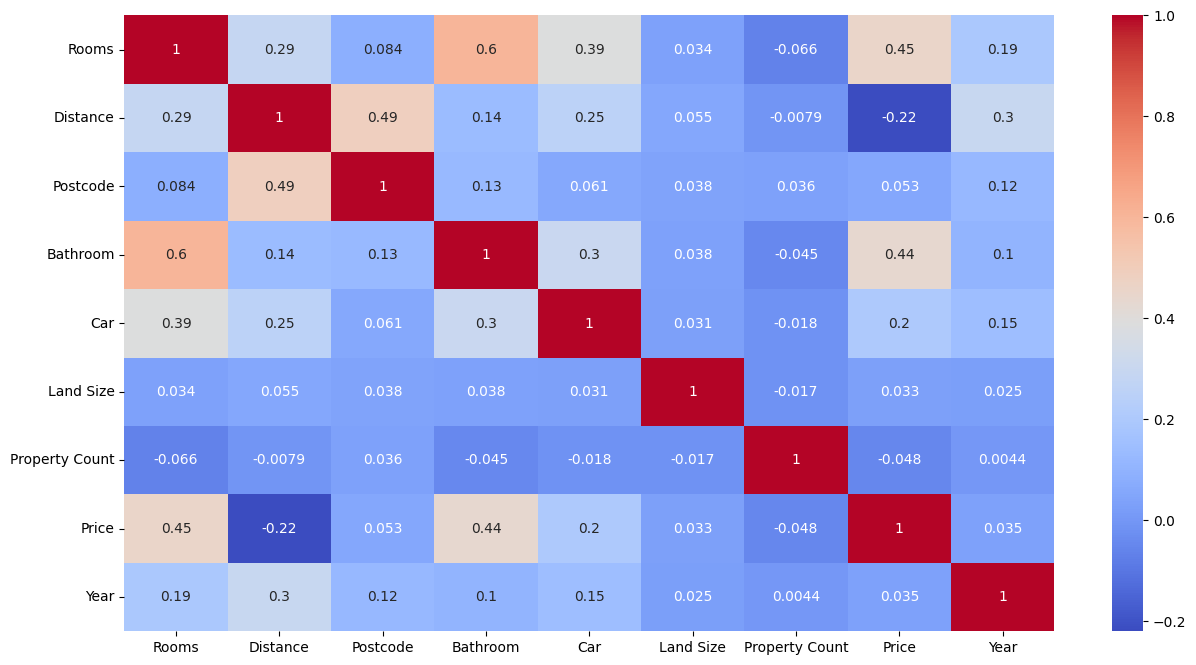

In [11]:
# heatmap
plt.figure(figsize=(15,8))
sns.heatmap(melbourne_df.corr(), annot=True, cmap='coolwarm')

In [12]:
# Base on the heatmap the dropping of some columns are needed
melbourne_df.drop(['Postcode',
                   'Year',
                   'Land Size',
                   'Property Count'], axis=1, inplace=True)
melbourne_df

,Rooms,Type,Distance,Bathroom,Car,Region,ParkingArea,Price
1,3,t,13.5,2.0,1.0,Western Metropolitan,Detached Garage,840000.0
2,2,h,3.3,1.0,0.0,Southern Metropolitan,Attached Garage,1275000.0
3,2,h,3.3,1.0,0.0,Southern Metropolitan,Indoor,1455000.0
5,4,h,6.4,2.0,4.0,Northern Metropolitan,Underground,2000000.0
6,3,h,6.4,2.0,2.0,Northern Metropolitan,Outdoor Stall,1110000.0
...,...,...,...,...,...,...,...,...
34846,3,h,25.2,1.0,1.0,South-Eastern Metropolitan,Outdoor Stall,771000.0
34848,2,h,6.4,1.0,1.0,Western Metropolitan,Carport,611500.0
34851,3,h,22.7,1.0,6.0,South-Eastern Metropolitan,Indoor,627500.0
34855,3,h,22.2,2.0,1.0,South-Eastern Metropolitan,Detached Garage,780500.0


In [13]:
melbourne_df.describe()

,Rooms,Distance,Bathroom,Car,Price
count,17701.000000,17701.000000,17701.000000,17701.000000,1.770100e+04
mean,3.053839,11.154144,1.584882,1.698887,1.094671e+06
std,0.944616,6.644866,0.704774,0.998673,6.557413e+05
min,1.000000,0.000000,0.000000,0.000000,8.500000e+04
25%,2.000000,6.500000,1.000000,1.000000,6.600000e+05
50%,3.000000,10.400000,1.000000,2.000000,9.120000e+05
75%,4.000000,13.900000,2.000000,2.000000,1.345000e+06
max,12.000000,48.100000,9.000000,18.000000,1.120000e+07


# Normality check

In [14]:
from scipy import stats
from sklearn.svm import SVR
from scipy.stats import norm, skew
from datetime import datetime as dt
from __future__ import print_function

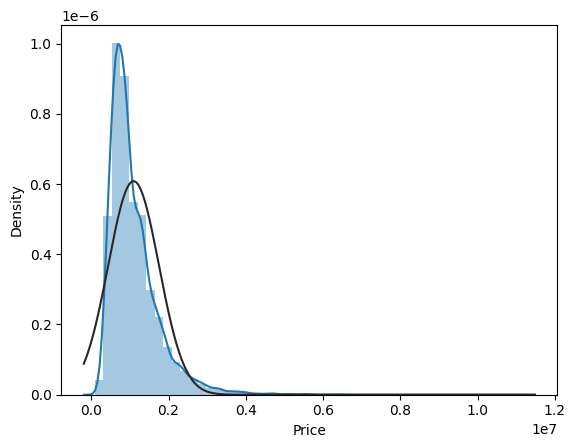

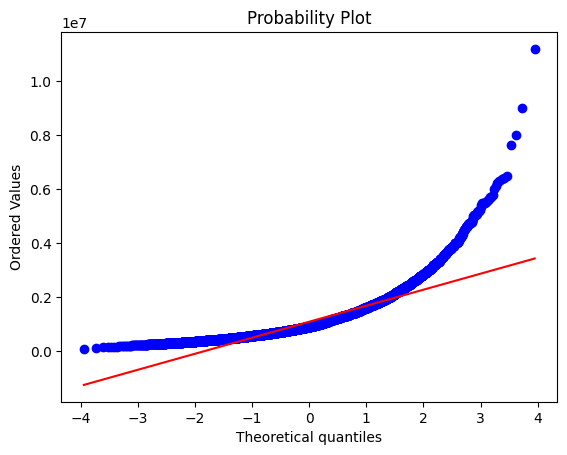

In [15]:
# Check the histogram and probability plot to see whether the target feature is normally distributed
sns.distplot(melbourne_df["Price"], fit=norm)
fig = plt.figure()
prob = stats.probplot(melbourne_df["Price"], plot=plt)


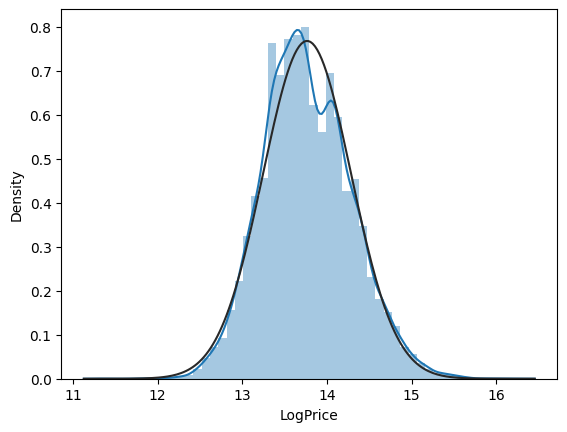

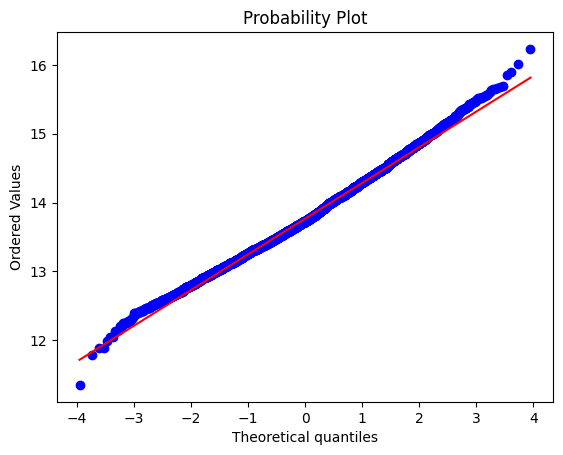

In [16]:
# Since the probability plot looks like log distribution, we can transform it with np.log()
melbourne_df["LogPrice"] = np.log(melbourne_df["Price"])
dist_price = sns.distplot(melbourne_df["LogPrice"], fit=norm)
fig = plt.figure()
prob_log = stats.probplot(melbourne_df["LogPrice"], plot=plt)
plt.show()


# Outliers

In [17]:
# Value < Q1 - 1,5*IQR OR Value > Q3 + 1,5 * IQR
def finding_outliers(data, variable_name) :
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower =  data[variable_name].quantile(0.25) -1.5*iqr
    upper =  data[variable_name].quantile(0.75) + 1.5*iqr
    return data [(data[variable_name] < lower) | (data[variable_name] > upper)]

<Axes: ylabel='Price'>

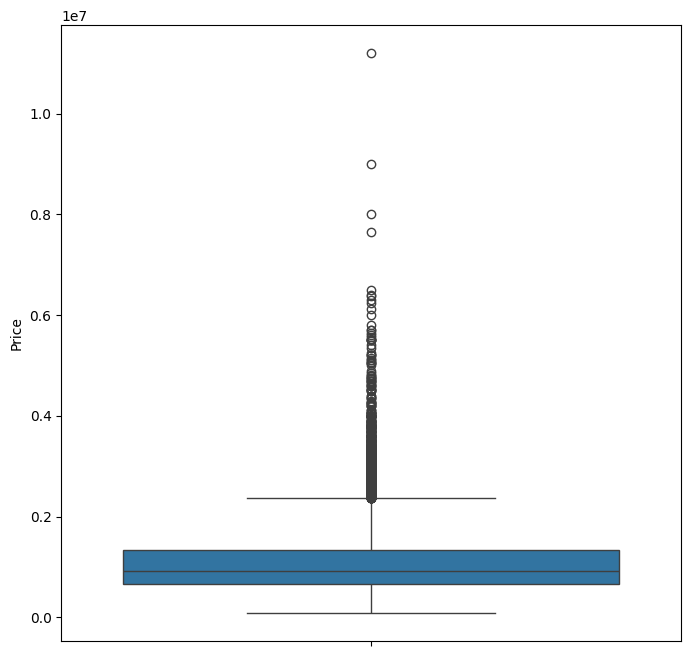

In [18]:
# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=melbourne_df)


<Axes: ylabel='Price'>

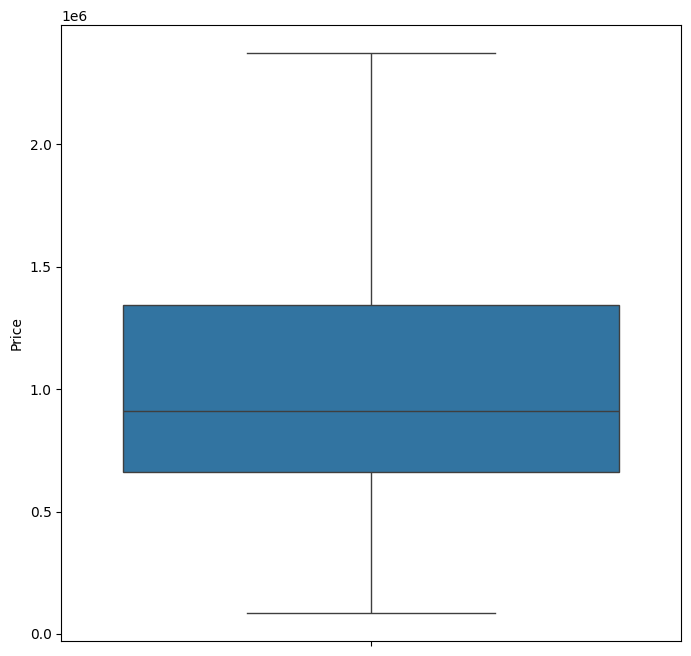

In [19]:
# # Price outliers
finding_outliers(melbourne_df, "Price").sort_values("Price")

# For price
iqr_price = melbourne_df["Price"].quantile(0.75) - melbourne_df["Price"].quantile(0.25)
melbourne_df["Price"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Price").index, "Price")] = melbourne_df["Price"].quantile(0.75) + 1.5 * iqr_price

# Price boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Price", data=melbourne_df)


<Axes: ylabel='Rooms'>

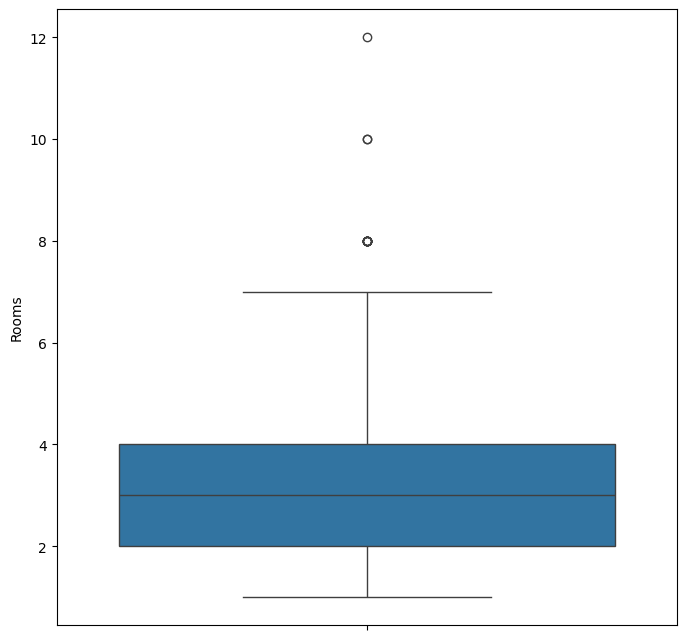

In [20]:
# rooms boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Rooms", data=melbourne_df)


<Axes: ylabel='Rooms'>

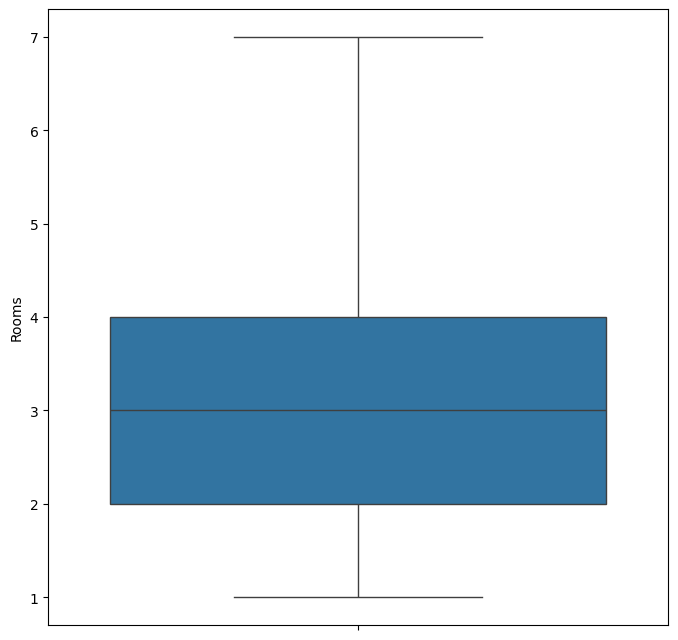

In [21]:
# room outliers
finding_outliers(melbourne_df, "Rooms").sort_values("Rooms")

# For price
iqr_price = melbourne_df["Rooms"].quantile(0.75) - melbourne_df["Rooms"].quantile(0.25)
melbourne_df["Rooms"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Rooms").index, "Rooms")] = melbourne_df["Rooms"].quantile(0.75) + 1.5 * iqr_price

# room boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Rooms", data=melbourne_df)


<Axes: ylabel='Bathroom'>

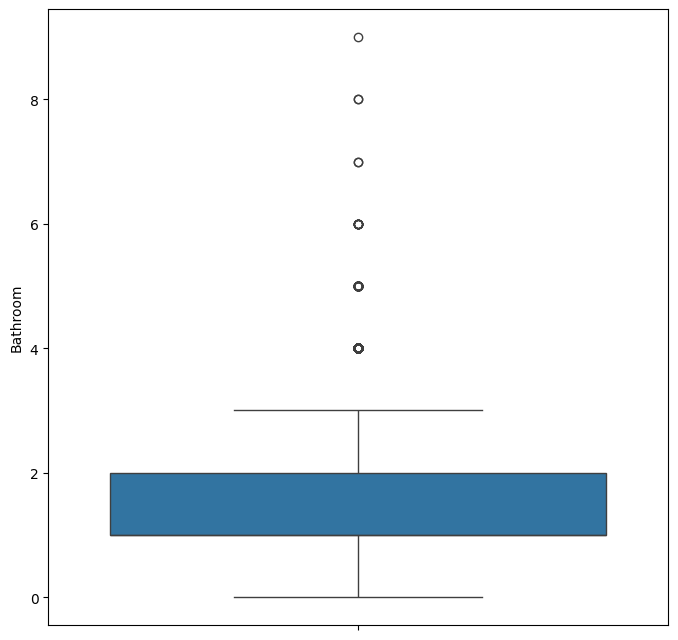

In [22]:
# Bathroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bathroom", data=melbourne_df)


<Axes: ylabel='Bathroom'>

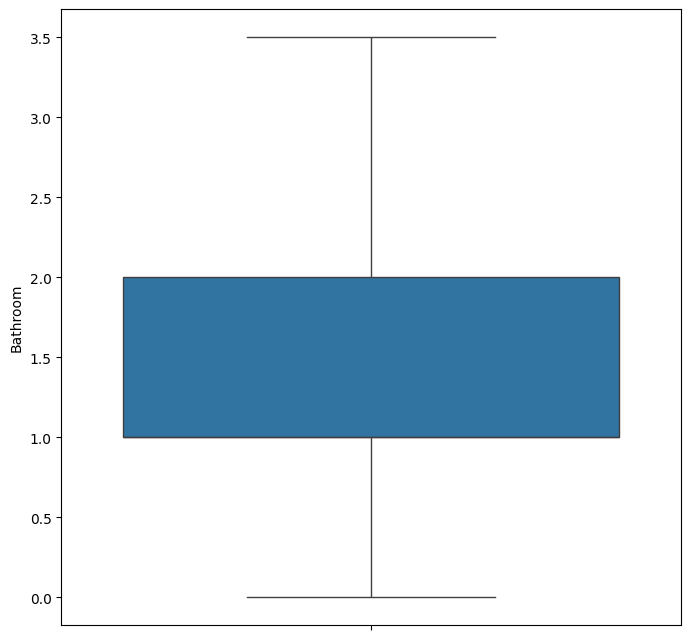

In [23]:
# Bathroom outliers
finding_outliers(melbourne_df, "Bathroom").sort_values("Bathroom")

# bathroom
iqr_price = melbourne_df["Bathroom"].quantile(0.75) - melbourne_df["Bathroom"].quantile(0.25)
melbourne_df["Bathroom"].quantile(0.75) + 1.5 * iqr_price
melbourne_df.loc[(finding_outliers(melbourne_df, "Bathroom").index, "Bathroom")] = melbourne_df["Bathroom"].quantile(0.75) + 1.5 * iqr_price

# Bathroom boxplot
plt.figure(figsize=(8,8))
sns.boxplot(y="Bathroom", data=melbourne_df)


# Relationships

### Boxplots

<Axes: xlabel='Bathroom', ylabel='Price'>

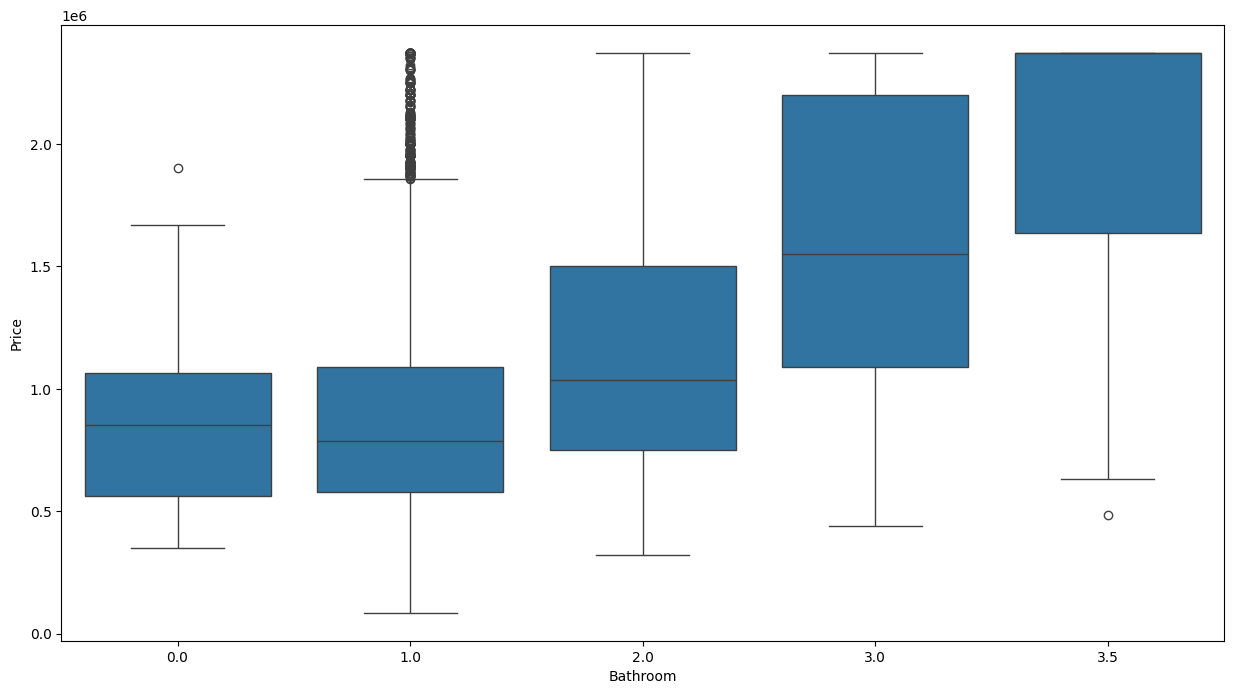

In [24]:
# Plot Bathroom vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x="Bathroom", y="Price", data=melbourne_df)


<Axes: xlabel='Rooms', ylabel='Price'>

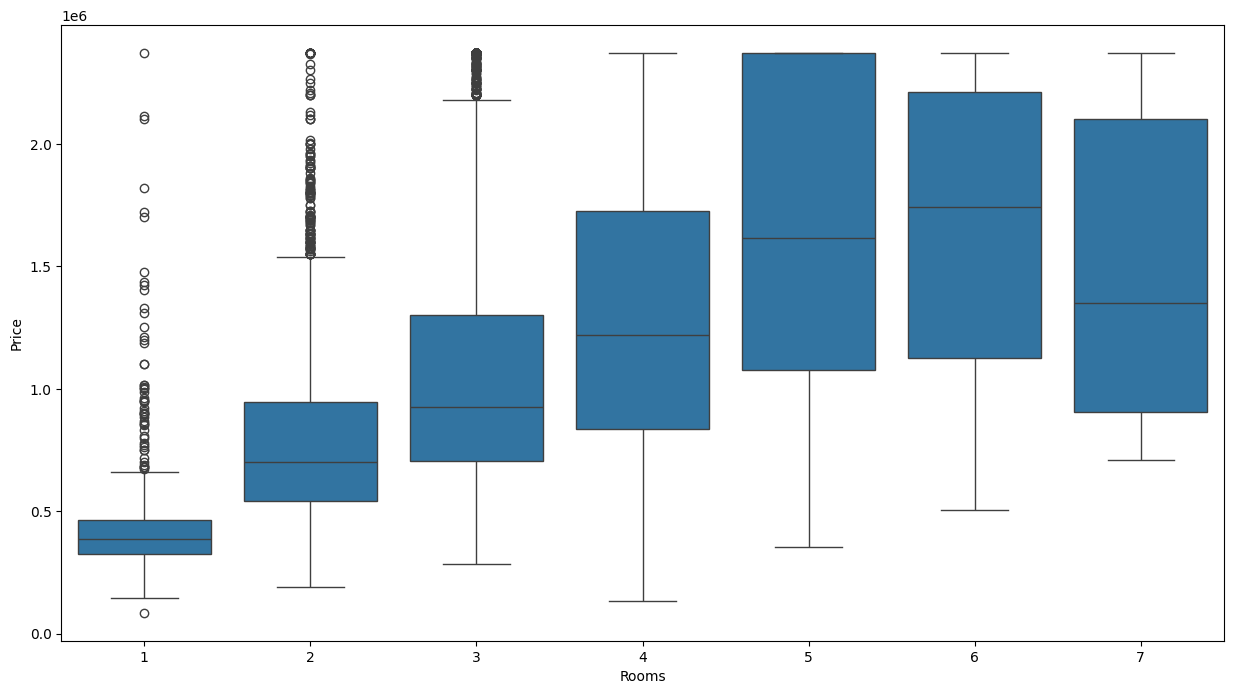

In [25]:
# Plot rooms vs Price
plt.figure(figsize=(15,8))
sns.boxplot(x="Rooms", y="Price", data=melbourne_df)


<Axes: xlabel='Rooms', ylabel='Price'>

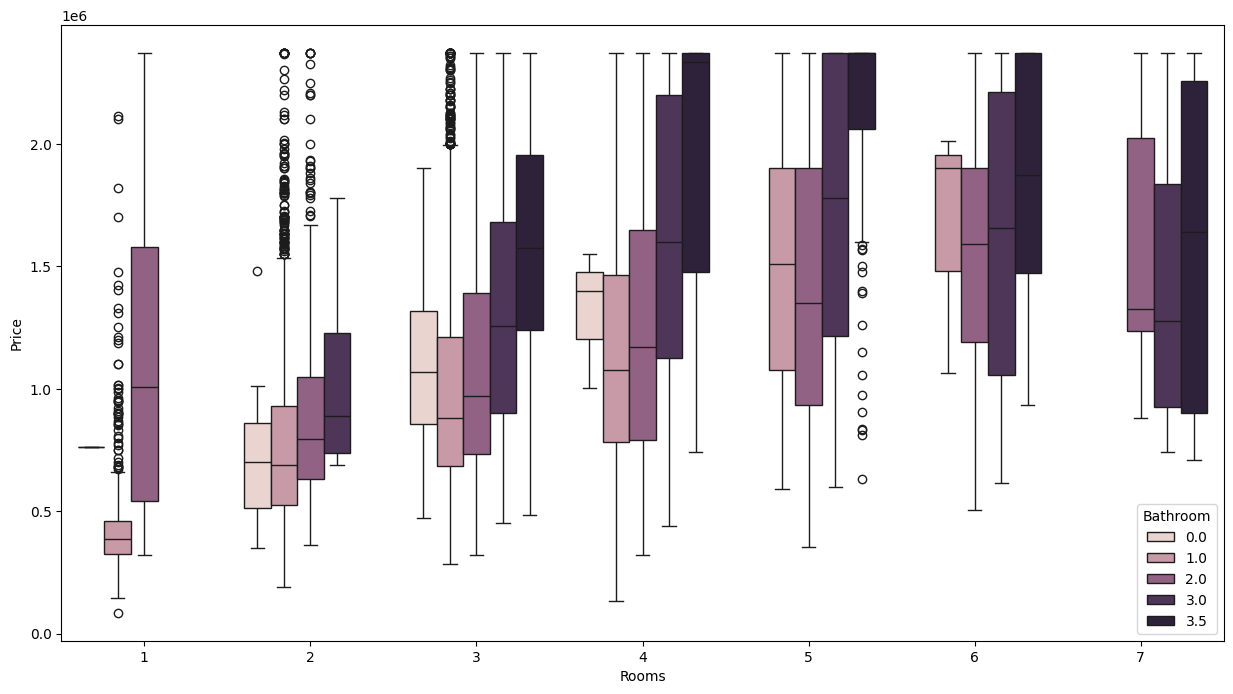

In [26]:
# Plot Price, rooms and Bathroom
plt.figure(figsize=(15,8))
sns.boxplot(x="Rooms", y="Price", hue="Bathroom", data=melbourne_df)


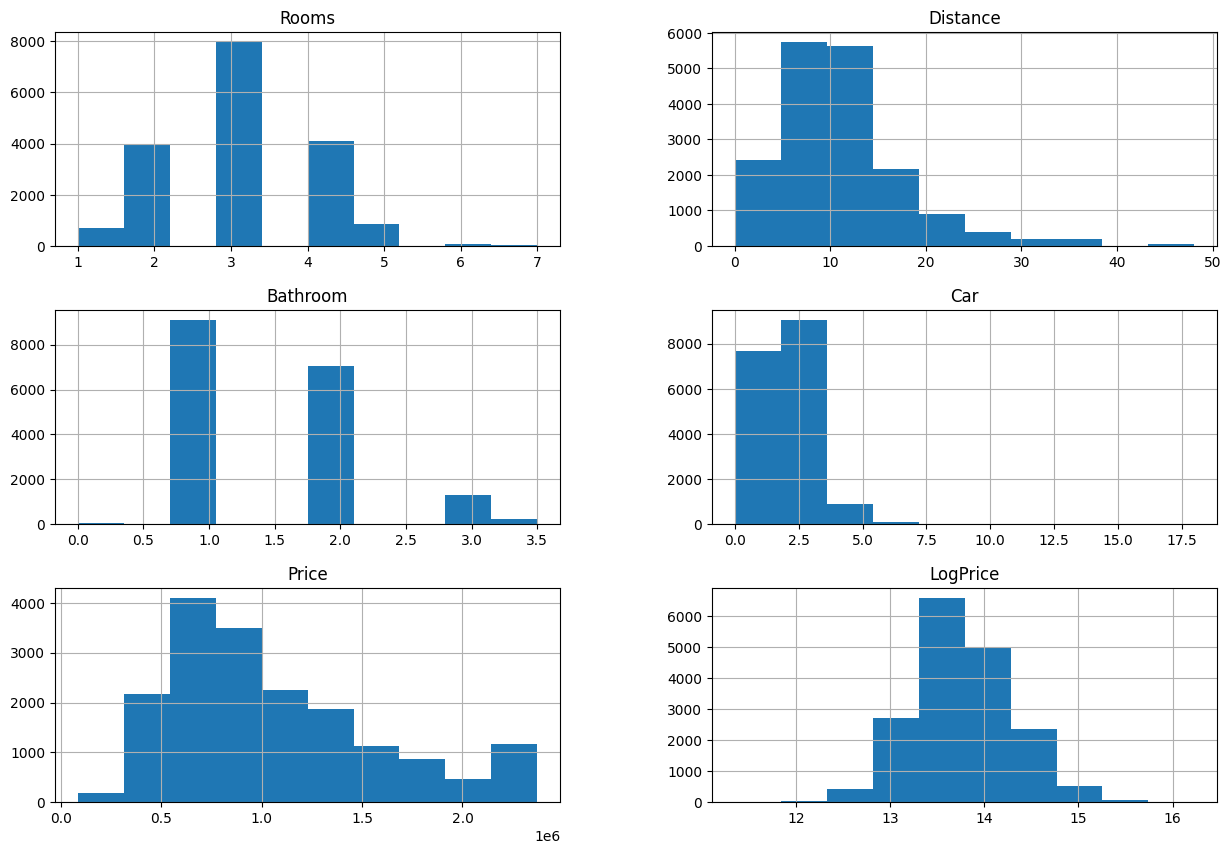

In [27]:
# Plot each numerical attribute
melbourne_df.hist(figsize=(15, 10))
plt.show()

### Countplots

<Axes: xlabel='Bathroom', ylabel='count'>

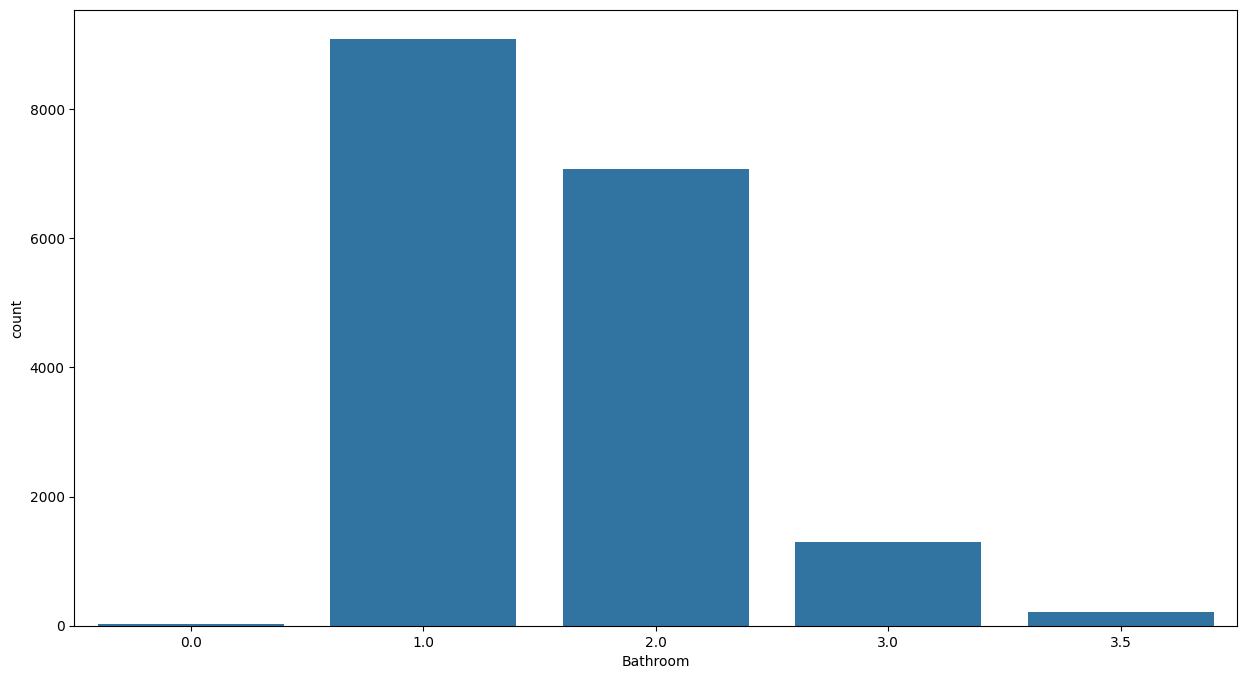

In [28]:
# Plot Bathroom
plt.figure(figsize=(15,8))
sns.countplot(x="Bathroom", data=melbourne_df)


<Axes: xlabel='Rooms', ylabel='count'>

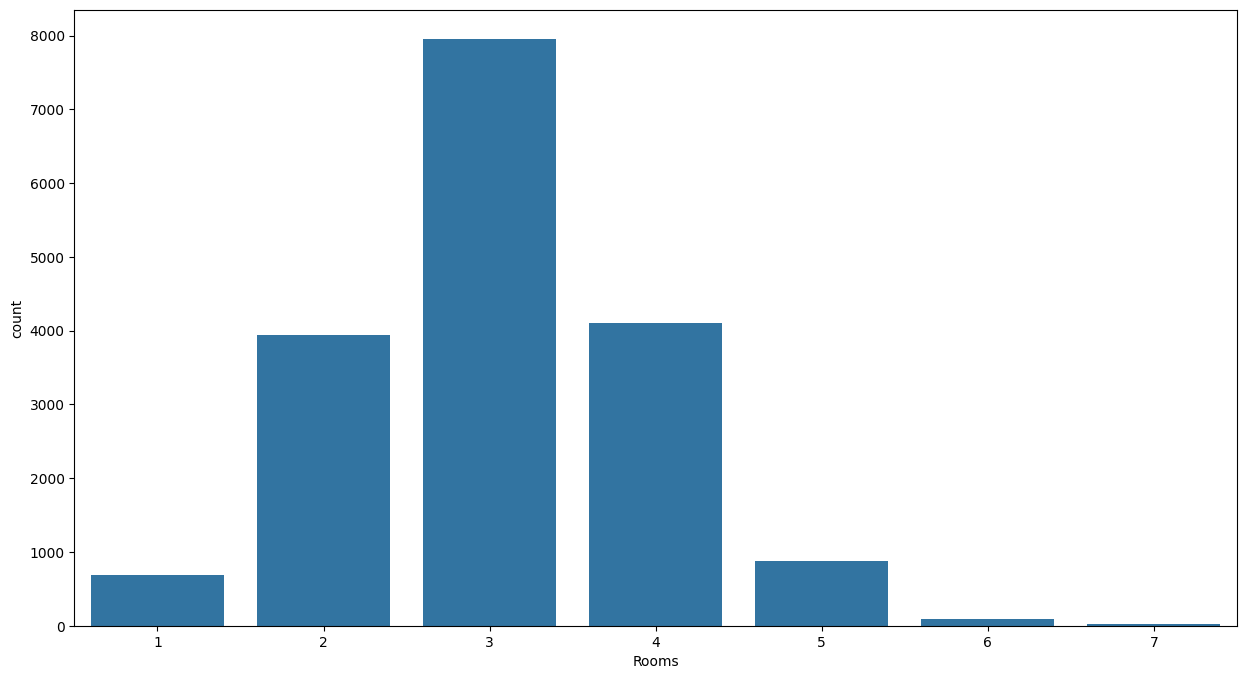

In [29]:
# Plot Rooms
plt.figure(figsize = (15,8))
sns.countplot(x="Rooms", data=melbourne_df)


<Axes: xlabel='Type', ylabel='count'>

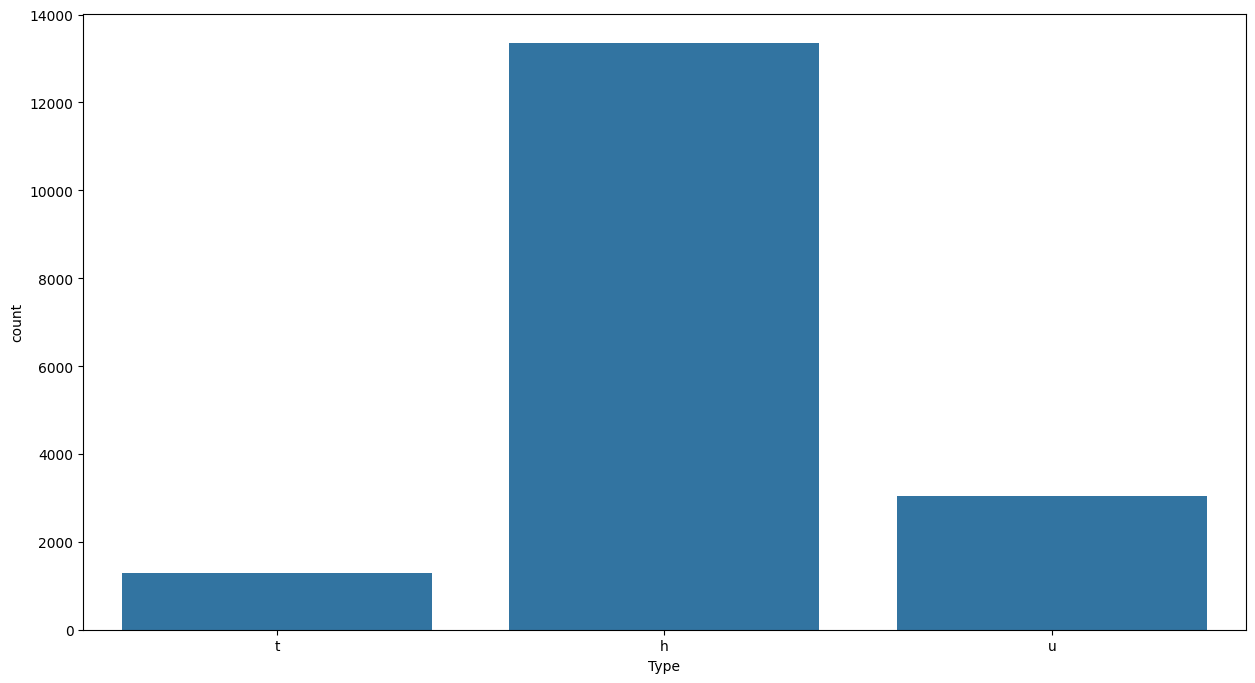

In [30]:
# Plot Type
plt.figure(figsize = (15,8))
sns.countplot(x="Type", data=melbourne_df)


<Axes: xlabel='Car', ylabel='count'>

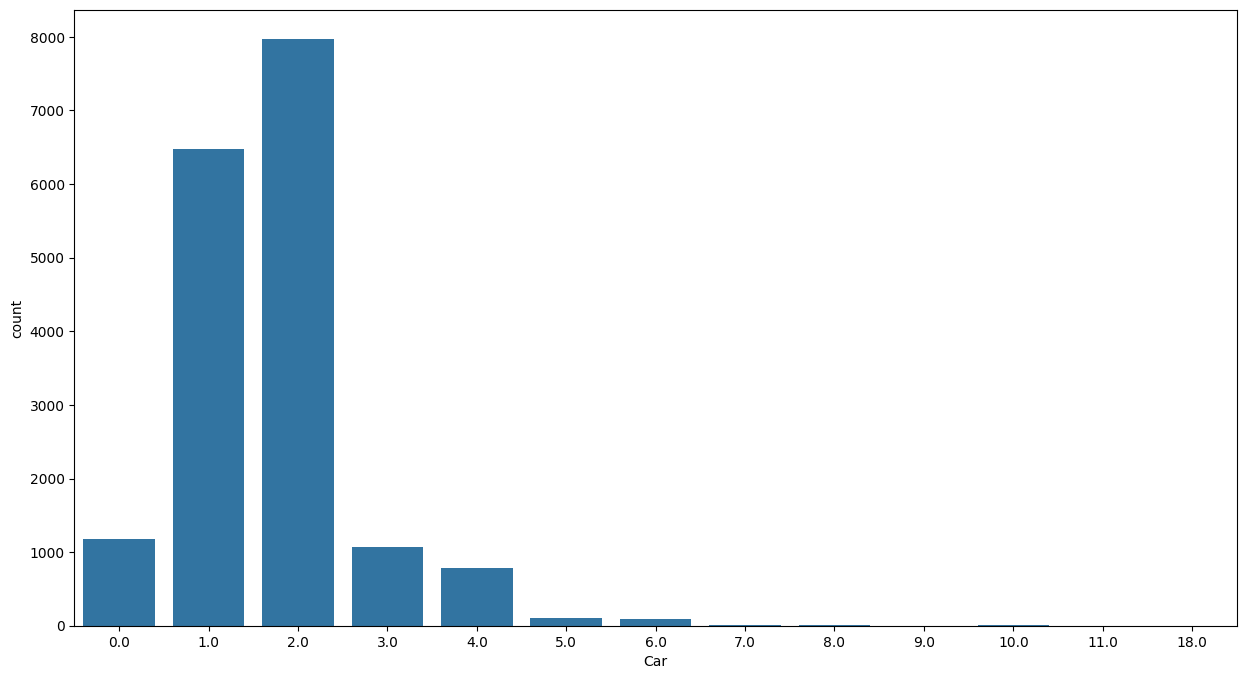

In [31]:
# Plot Car 
plt.figure(figsize = (15,8))
sns.countplot(x="Car", data=melbourne_df)


[Text(0, 0, 'Western Metropolitan'),
 Text(1, 0, 'Southern Metropolitan'),
 Text(2, 0, 'Northern Metropolitan'),
 Text(3, 0, 'Eastern Metropolitan'),
 Text(4, 0, 'South-Eastern Metropolitan'),
 Text(5, 0, 'Eastern Victoria'),
 Text(6, 0, 'Northern Victoria'),
 Text(7, 0, 'Western Victoria')]

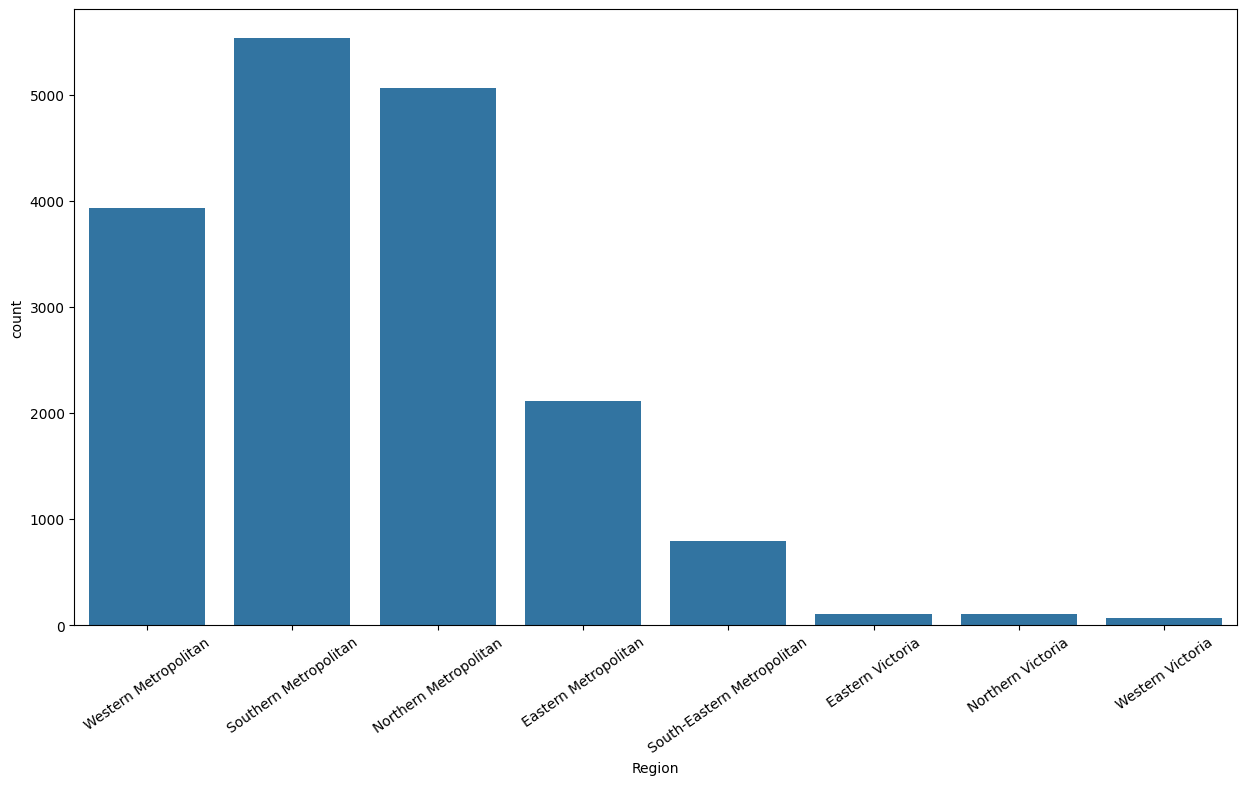

In [32]:
# Plot Region 
plt.figure(figsize = (15,8))
ax = sns.countplot(x="Region", data=melbourne_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Western Metropolitan'),
  Text(1, 0, 'Southern Metropolitan'),
  Text(2, 0, 'Northern Metropolitan'),
  Text(3, 0, 'Eastern Metropolitan'),
  Text(4, 0, 'South-Eastern Metropolitan'),
  Text(5, 0, 'Eastern Victoria'),
  Text(6, 0, 'Northern Victoria'),
  Text(7, 0, 'Western Victoria')])

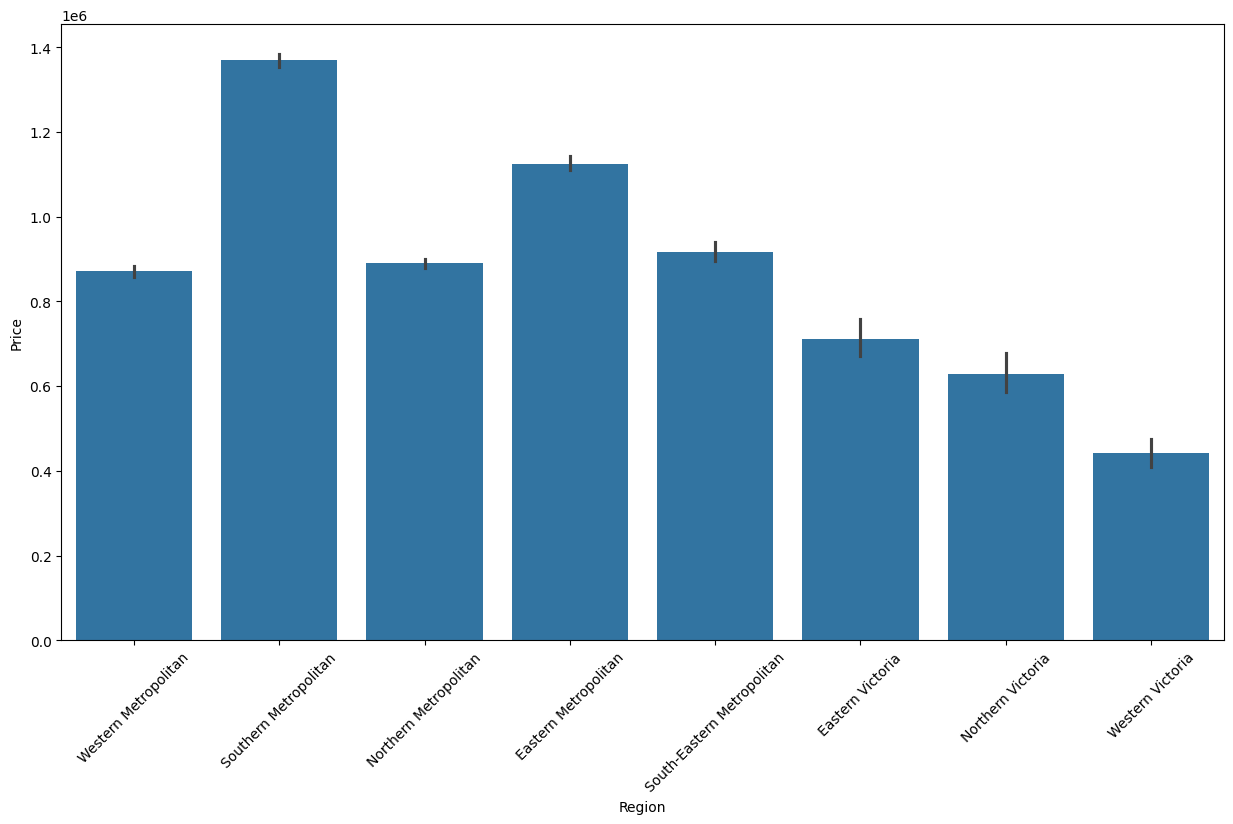

In [33]:
# Plot Region vs Price
plt.figure(figsize=(15,8))
sns.barplot(x="Region", y="Price", data=melbourne_df)
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 35)
plt.xticks(rotation=45)


In [34]:
melbourne_df.groupby('Region')['Price'].mean()

Region
Eastern Metropolitan          1.125271e+06
Eastern Victoria              7.118665e+05
Northern Metropolitan         8.902723e+05
Northern Victoria             6.290433e+05
South-Eastern Metropolitan    9.167734e+05
Southern Metropolitan         1.368646e+06
Western Metropolitan          8.706599e+05
Western Victoria              4.416706e+05
Name: Price, dtype: float64

## Data preparation

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [36]:
# Save DataFrame as csv after cleaning
housing_df = melbourne_df

In [37]:
housing_df

,Rooms,Type,Distance,Bathroom,Car,Region,ParkingArea,Price,LogPrice
1,3,t,13.5,2.0,1.0,Western Metropolitan,Detached Garage,840000.0,13.641157
2,2,h,3.3,1.0,0.0,Southern Metropolitan,Attached Garage,1275000.0,14.058457
3,2,h,3.3,1.0,0.0,Southern Metropolitan,Indoor,1455000.0,14.190516
5,4,h,6.4,2.0,4.0,Northern Metropolitan,Underground,2000000.0,14.508658
6,3,h,6.4,2.0,2.0,Northern Metropolitan,Outdoor Stall,1110000.0,13.919871
...,...,...,...,...,...,...,...,...,...
34846,3,h,25.2,1.0,1.0,South-Eastern Metropolitan,Outdoor Stall,771000.0,13.555444
34848,2,h,6.4,1.0,1.0,Western Metropolitan,Carport,611500.0,13.323670
34851,3,h,22.7,1.0,6.0,South-Eastern Metropolitan,Indoor,627500.0,13.349499
34855,3,h,22.2,2.0,1.0,South-Eastern Metropolitan,Detached Garage,780500.0,13.567690


In [38]:
# Enumerate type
encode = LabelEncoder().fit(housing_df['Type'])
carpet = {x: i for i, x in enumerate(encode.classes_)}
carpet

{'h': 0, 't': 1, 'u': 2}

In [39]:
# Enumerate region
encoder = LabelEncoder().fit(housing_df['Region'])
carp = {x: i for i, x in enumerate(encoder.classes_)}
carp

{'Eastern Metropolitan': 0,
 'Eastern Victoria': 1,
 'Northern Metropolitan': 2,
 'Northern Victoria': 3,
 'South-Eastern Metropolitan': 4,
 'Southern Metropolitan': 5,
 'Western Metropolitan': 6,
 'Western Victoria': 7}

In [40]:
# Convert to numerical variable 
housing_df['Type'] = LabelEncoder().fit_transform(housing_df['Type'])
housing_df['Type']

1        1
2        0
3        0
5        0
6        0
        ..
34846    0
34848    0
34851    0
34855    0
34856    0
Name: Type, Length: 17701, dtype: int32

In [41]:
housing_df['Region'] = LabelEncoder().fit_transform(housing_df['Region'])
housing_df['Region']

1        6
2        5
3        5
5        2
6        2
        ..
34846    4
34848    6
34851    4
34855    4
34856    2
Name: Region, Length: 17701, dtype: int32

In [42]:
# Convert categorical data to numeric and separate target feature for training data
X = housing_df.drop(["LogPrice", 'Price' , 'ParkingArea'],  axis = 1)

y = housing_df['Price']

X

,Rooms,Type,Distance,Bathroom,Car,Region
1,3,1,13.5,2.0,1.0,6
2,2,0,3.3,1.0,0.0,5
3,2,0,3.3,1.0,0.0,5
5,4,0,6.4,2.0,4.0,2
6,3,0,6.4,2.0,2.0,2
...,...,...,...,...,...,...
34846,3,0,25.2,1.0,1.0,4
34848,2,0,6.4,1.0,1.0,6
34851,3,0,22.7,1.0,6.0,4
34855,3,0,22.2,2.0,1.0,4


In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17701 entries, 1 to 34856
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rooms     17701 non-null  int64  
 1   Type      17701 non-null  int32  
 2   Distance  17701 non-null  float64
 3   Bathroom  17701 non-null  float64
 4   Car       17701 non-null  float64
 5   Region    17701 non-null  int32  
dtypes: float64(3), int32(2), int64(1)
memory usage: 1.3 MB


In [44]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#Scala data
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Data modeling

#### Linear Regression model

In [45]:
# Fit the Linear Regression model with data
model_lr = LinearRegression().fit(X_train_scaled, y_train)

In [46]:
# Calculate training and testing score 
training_score = model_lr.score(X_train_scaled, y_train)
testing_score = model_lr.score(X_test_scaled, y_test)

In [47]:
# Print the training and testing score
print(f"Model: Linear Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Linear Regression
Training Score: 0.47263902182867934
Testing Score: 0.47667745157982133


#### Random Forest model

In [48]:
# Fit the Random Forest model with data
model_rf = RandomForestRegressor(n_estimators = 100, criterion = 'squared_error',
                              random_state = 42,
                             max_depth = 2).fit(X_train, y_train)

In [49]:
# Calculate the training and testing score
training_score = model_rf.score(X_train, y_train)
testing_score = model_rf.score(X_test_scaled, y_test)

In [50]:
# Print the training and testing score
print(f"Model: Random Forest Regressor")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Random Forest Regressor
Training Score: 0.3230144067645486
Testing Score: 0.10273595914423317


#### Decision Tree model

In [51]:
# Fit the Decision Tree model with data
model_tree = DecisionTreeRegressor(criterion='squared_error', 
                                  splitter='best', max_depth=None, 
                                  min_samples_split=2,min_samples_leaf=1, 
                                  min_weight_fraction_leaf=0.0,max_features=None, 
                                  random_state= 42, max_leaf_nodes=None, 
                                  min_impurity_decrease=0.0, ccp_alpha=0.0,).fit(X_train, y_train)

In [52]:
# Calculate training and testing score 
training_score = model_tree.score(X_train, y_train)
testing_score = model_tree.score(X_test, y_test)

In [53]:
# Print the training testing score
print(f"Model: Decision Tree Regressor")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Decision Tree Regressor
Training Score: 0.8930730989328746
Testing Score: 0.7055684252533392


#### Randomized Search CV model

In [54]:
# Fit the Randomized Search model with data
param_dists = {'criterion' : ['squared_error', 'friedman_mse',], 
                       'max_depth': [3,4,7, None],
                        'min_samples_split':np.arange(0.1, 1.1, 0.1),
                        'min_samples_leaf' : list(range(1, 21)), 
                        'max_features' : ['auto', 'sqrt', 'log2', None]}

model_cv = RandomizedSearchCV(estimator = RandomForestRegressor(random_state= 42), 
                              param_distributions = param_dists,  n_iter=200, 
                              scoring= 'neg_mean_squared_error',
                              cv=5, random_state= 42).fit(X_train_scaled, y_train)

In [55]:
# Calculate training and testing score 
training_score = model_cv.score(X_train_scaled, y_train)
testing_score = model_cv.score(X_test_scaled, y_test)

In [56]:
# Print the training testing score
print(f"Model: Randomized Search CV")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Randomized Search CV
Training Score: -128259430013.21576
Testing Score: -127841756945.85661


#### Support Vector Regressor model

In [57]:
# Fit the Support Vector Regressor model with data
model_svr = SVR(kernel = "rbf").fit(X_train_scaled, y_train)

In [58]:
# Calculate training and testing score 
training_score = model_svr.score(X_train_scaled, y_train)
testing_score = model_svr.score(X_test_scaled, y_test)

In [59]:
# Print the training testing score
print(f"Model: Support Vector Regressor")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Support Vector Regressor
Training Score: -0.07321762864472436
Testing Score: -0.07649985872953491


#### Lasso model

In [60]:
# Fit the Lasso model with data
model_lasso = Lasso(alpha =1.0 , max_iter = 1000).fit(X_train_scaled, y_train)

In [61]:
# Calculate training and testing score 
training_score = model_lasso.score(X_train_scaled, y_train)
testing_score = model_lasso.score(X_test_scaled, y_test)

In [62]:
# Print the training testing score
print(f"Model: Lasso Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Lasso Regression
Training Score: 0.47263902181090134
Testing Score: 0.47667740667103875


#### Ridge model

In [63]:
# Fit the Ridge model with data
model_ridge = Ridge(alpha = 100).fit(X_train, y_train)

In [64]:
# Calculate training and testing score 
training_score = model_ridge.score(X_train_scaled, y_train)
testing_score = model_ridge.score(X_test_scaled, y_test)

In [65]:
# Print the training testing score
print(f"Model: Ridge Regression")
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Model: Ridge Regression
Training Score: -0.2822933534527383
Testing Score: -0.2604692883489914


## Price Predictions

In [66]:
 # Predict the price with Linear Regression model
y_pred = model_lr.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
1622,-4.469570e+05,685000.0
9623,-1.761269e+06,1370000.0
26378,-2.269966e+06,563000.0
32213,-1.143592e+06,855000.0
4631,-3.120145e+03,2000000.0
...,...,...
31615,-4.133502e+05,820000.0
27040,-2.658093e+06,840500.0
34087,-2.733184e+05,380000.0
34240,-4.434482e+06,700000.0


In [67]:
# Predict the price with Random Forest model 
y_pred = model_rf.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})


,Prediction,Actual
1622,5.520592e+05,685000.0
9623,9.405071e+05,1370000.0
26378,9.329661e+05,563000.0
32213,9.405071e+05,855000.0
4631,1.388297e+06,2000000.0
...,...,...
31615,1.388297e+06,820000.0
27040,9.405071e+05,840500.0
34087,5.520592e+05,380000.0
34240,9.034485e+05,700000.0


In [68]:
 # Predict the price with Decision Tree model 
y_pred = model_tree.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})


,Prediction,Actual
1622,639300.00,685000.0
9623,1231418.75,1370000.0
26378,457875.00,563000.0
32213,1492500.00,855000.0
4631,2372500.00,2000000.0
...,...,...
31615,803750.00,820000.0
27040,746250.00,840500.0
34087,402200.00,380000.0
34240,617000.00,700000.0


In [69]:
 # Predict the price with Random Search CV model 
y_pred = model_cv.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
1622,903448.527536,685000.0
9623,712394.149437,1370000.0
26378,712394.149437,563000.0
32213,712394.149437,855000.0
4631,712394.149437,2000000.0
...,...,...
31615,712394.149437,820000.0
27040,712394.149437,840500.0
34087,903448.527536,380000.0
34240,903448.527536,700000.0


In [70]:
 # Predict the price with Support Vector Regressor model 
y_pred = model_svr.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
1622,914310.848680,685000.0
9623,914310.937127,1370000.0
26378,914310.937127,563000.0
32213,914310.937127,855000.0
4631,914310.937055,2000000.0
...,...,...
31615,914310.936628,820000.0
27040,914310.937127,840500.0
34087,914310.231199,380000.0
34240,914310.937127,700000.0


In [71]:
 # Predict the price with Lasso model 
y_pred = model_lasso.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
1622,-4.469498e+05,685000.0
9623,-1.761251e+06,1370000.0
26378,-2.269943e+06,563000.0
32213,-1.143579e+06,855000.0
4631,-3.113626e+03,2000000.0
...,...,...
31615,-4.133391e+05,820000.0
27040,-2.658068e+06,840500.0
34087,-2.733131e+05,380000.0
34240,-4.434447e+06,700000.0


In [72]:
 # Predict the price with Ridge model 
y_pred = model_ridge.predict(X_test)
pd.DataFrame({"Prediction": y_pred, "Actual": y_test})

,Prediction,Actual
1622,5.763639e+05,685000.0
9623,1.196320e+06,1370000.0
26378,7.780756e+05,563000.0
32213,1.276469e+06,855000.0
4631,1.771914e+06,2000000.0
...,...,...
31615,1.516226e+06,820000.0
27040,1.044116e+06,840500.0
34087,4.671935e+05,380000.0
34240,4.286459e+05,700000.0


## Save the model